Porfilio Trujillo Martinez

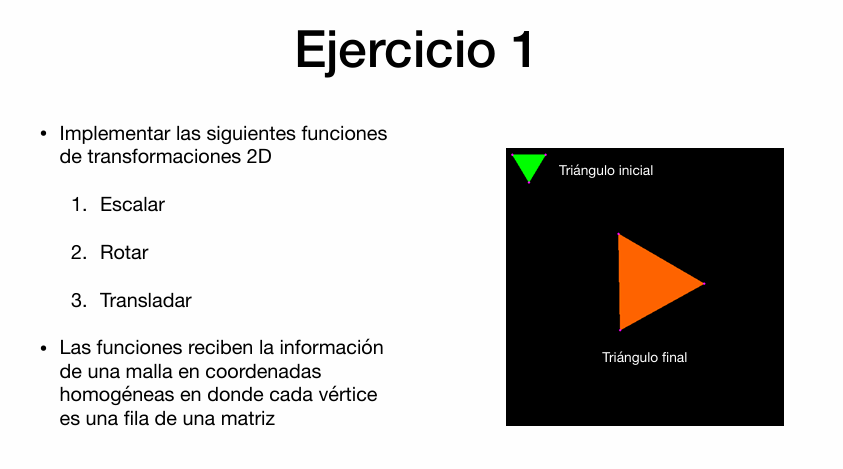

#Importar librerias

In [13]:
import numpy as np
from google.colab.patches import cv2_imshow

In [31]:
# Función para dibujar un triángulo en una imagen
def draw_triangle(im, triangle, color=(0,255,0)):
    cv2.drawContours(im, [triangle.astype(int)], 0, color, -1)

# Función para agregar texto a la imagen
def add_text(im, text, position, color=(255,255,255)):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(im, text, position, font, 0.5, color, 1, cv2.LINE_AA)


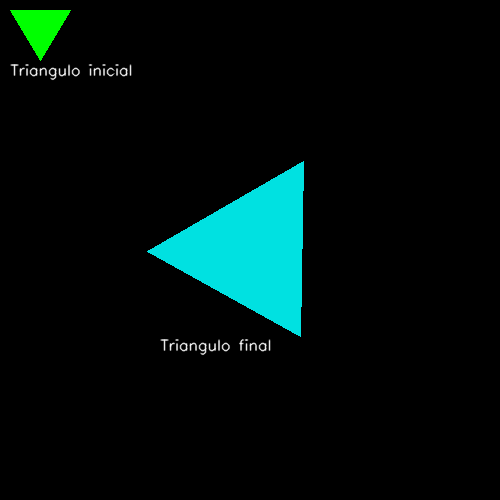

In [32]:

# Tamaño de la imagen
w = 500
h = 500
im = np.zeros((h,w,3), np.uint8)

# Coordenadas del triángulo original
triangle1 = np.array([[10,10], [70,10], [40, 60]])

# Escalar, rotar y trasladar el triángulo
s = 3  # Factor de escala
angle = 30  # Ángulo de rotación en grados
t = np.array([w/2, h/2])  # Punto de traslación al centro de la imagen

# Aplicar transformaciones
triangle_scaled = triangle1 * s
rotation_matrix = cv2.getRotationMatrix2D(tuple(t), angle, 1)
triangle_rotated = cv2.transform(np.array([triangle_scaled]), rotation_matrix)[0]
triangle_translated = triangle_rotated + t - np.mean(triangle_rotated, axis=0)

# Dibujar triángulos
draw_triangle(im, triangle1)
draw_triangle(im, triangle_translated, color=(225,225,0))

# Agregar texto
add_text(im, 'Triangulo inicial', (10, 75))
add_text(im, 'Triangulo final', (w-340, 350))

cv2_imshow(im)
